In [13]:
import numpy as np 
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [14]:
df = pd.read_csv('news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
labels = df.label
labels.head()


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [25]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

pac = PassiveAggressiveClassifier(max_iter=500,random_state=7)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cm)



Accuracy: 92.98%
[[591  47]
 [ 42 587]]


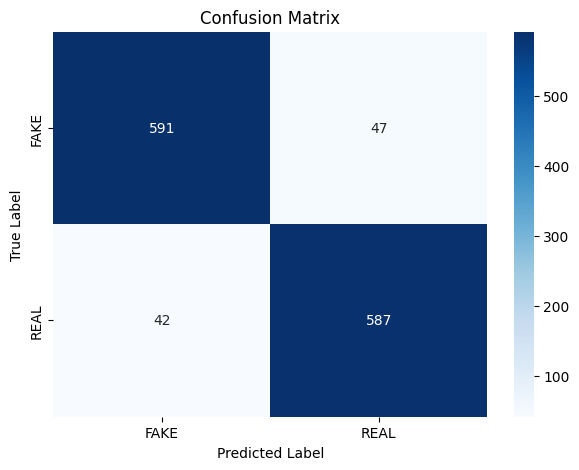

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')   
plt.ylabel('True Label')
plt.show()

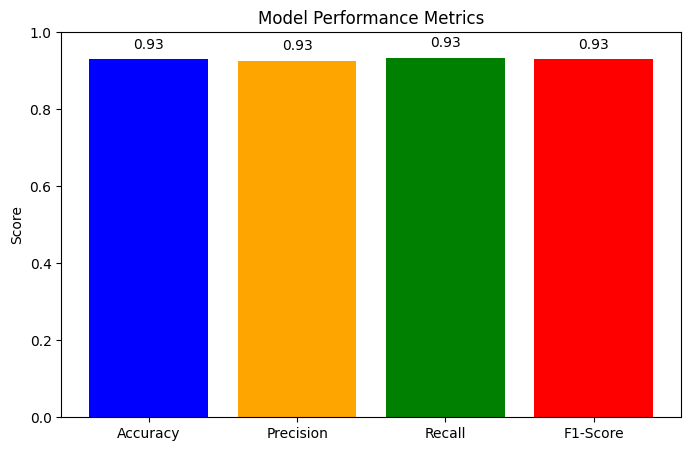

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, pos_label='REAL')
recall = recall_score(y_test, y_pred, pos_label='REAL')
f1 = f1_score(y_test, y_pred, pos_label='REAL')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [score, precision, recall, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')
plt.show()